In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/2018.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112449
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096343
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.139000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [ ]:
no_data = df[(df == 0).any(axis=1)]
print(no_data)

            Country or region  Score  GDP per capita  Social support  \
66                    Moldova  5.640           0.657           1.301   
78                     Greece  5.358           1.154           1.202   
92     Bosnia and Herzegovina  5.129           0.915           1.078   
97                    Somalia  4.982           0.000           0.712   
112              Sierra Leone  4.571           0.256           0.813   
141                    Angola  3.795           0.730           1.125   
154  Central African Republic  3.083           0.024           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
66                     0.620                         0.232       0.171   
78                     0.879                         0.131       0.000   
92                     0.758                         0.280       0.216   
97                     0.115                         0.674       0.238   
112                    0.000                         

In [ ]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop(columns = ['Overall rank'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
columns = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

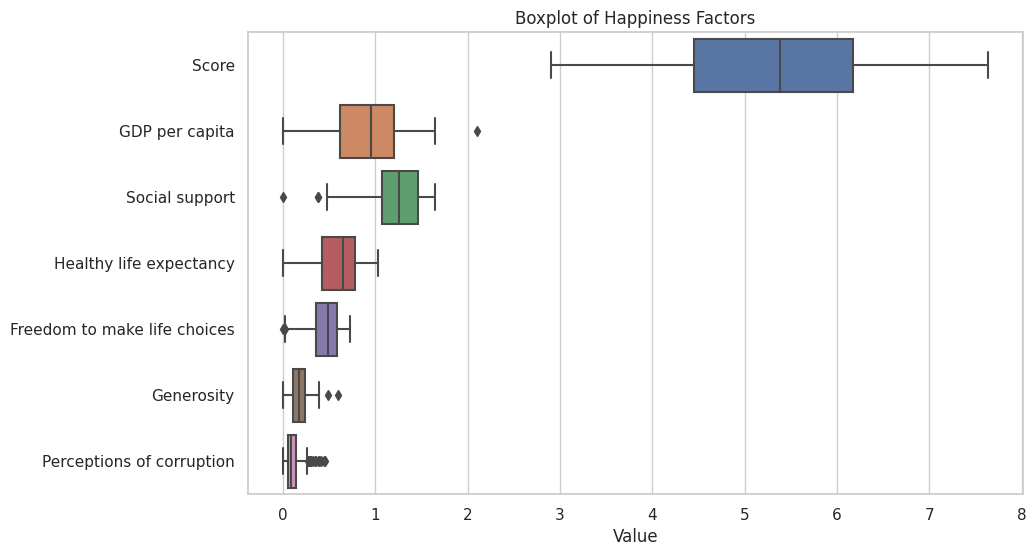

In [ ]:
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the figure
ax = sns.boxplot(data=df[columns], orient="h")
ax.set_title('Boxplot of Happiness Factors')
ax.set_xlabel('Value')

plt.show()

<ipython-input-23-ad5f22478c10>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm') #Creates a heatmap. df.corr() = creates a corr table of the dataframe.


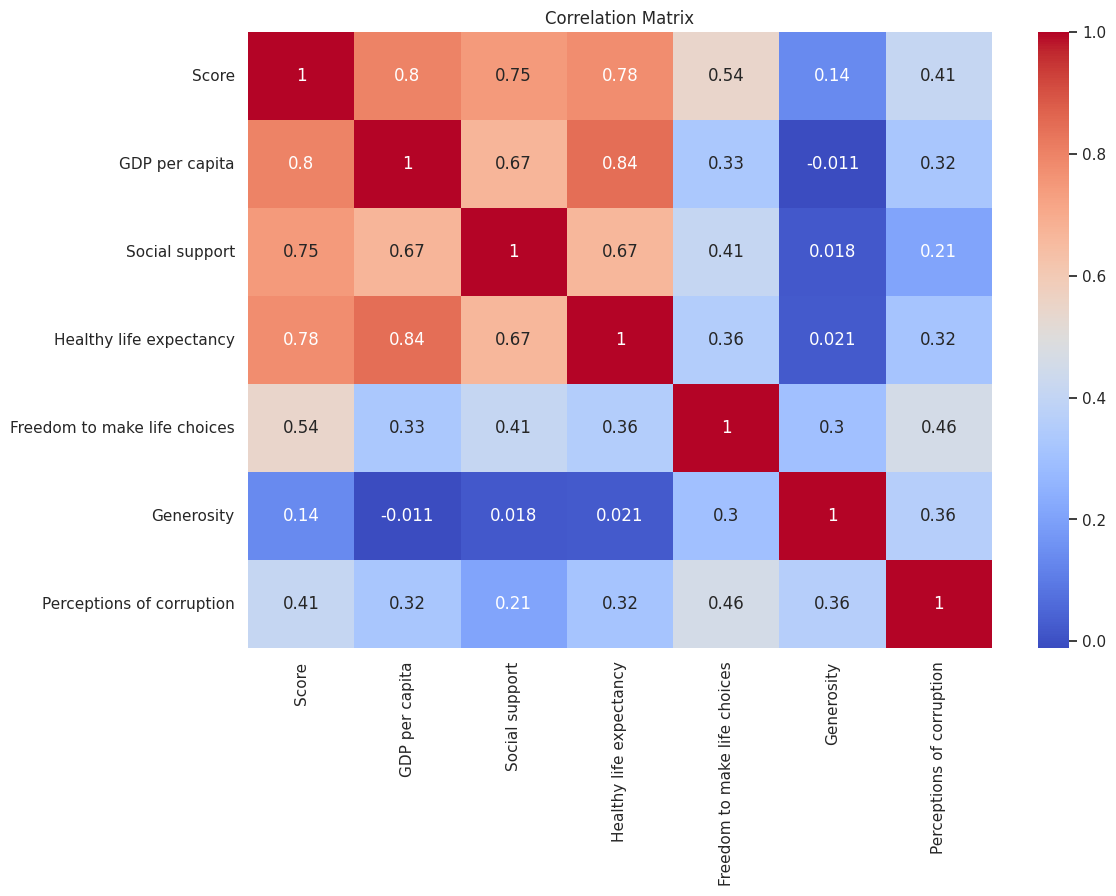

In [ ]:
# checking the correlation
plt.figure(figsize =(12,8)) #Sets the size of Plot.
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm') #Creates a heatmap. df.corr() = creates a corr table of the dataframe. 
plt.title('Correlation Matrix')
plt.show()

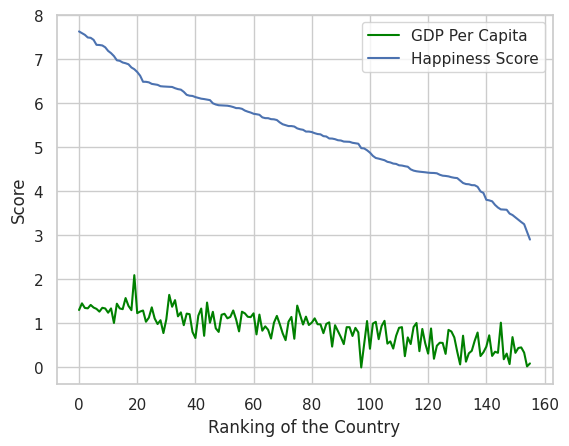

In [ ]:
df['GDP per capita'].plot(kind = 'line', color = 'green', label = 'GDP Per Capita')
df['Score'].plot(kind = 'line', label = 'Happiness Score')
plt.legend(loc = 'upper right')
plt.xlabel('Ranking of the Country')
plt.ylabel('Score')
plt.show()

In [ ]:
Q1 = df['GDP per capita'].quantile(0.25)
Q3 = df['GDP per capita']. quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['GDP per capita'] < lower_bound) | (df['GDP per capita'] > upper_bound)]
print(outliers)

       Country or region  Score  GDP per capita  Social support  \
19  United Arab Emirates  6.774           2.096           0.776   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
19                     0.67                         0.284       0.186   

    Perceptions of corruption  
19                      0.182  


In [ ]:
df.columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df. quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = {}
for column in df.columns:
  if column not in lower_bound or column not in upper_bound:
        continue
  column_outliers = df[(df[column] < lower_bound[column]) | (df[column] > upper_bound[column])]
  outliers[column] = column_outliers

print('Outlier data points:')
for column, column_outliers in outliers.items():
  print(f"Column: {column}")
  print(column_outliers)
  print()

Outlier data points:
Column: Score
Empty DataFrame
Columns: [Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption]
Index: []

Column: GDP per capita
       Country or region  Score  GDP per capita  Social support  \
19  United Arab Emirates  6.774           2.096           0.776   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
19                     0.67                         0.284       0.186   

    Perceptions of corruption  
19                      0.182  

Column: Social support
            Country or region  Score  GDP per capita  Social support  \
135                     Benin  4.141           0.378           0.372   
149                     Syria  3.462           0.689           0.382   
154  Central African Republic  3.083           0.024           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
135                 

<ipython-input-61-7095874dddd7>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-61-7095874dddd7>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df. quantile(0.75)
